In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%cd C:\Users\DWAIPAYAN\Desktop\Data Analysis Datasets
df=pd.read_csv('uber_data.csv')

C:\Users\DWAIPAYAN\Desktop\Data Analysis Datasets


In [4]:
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0
332,24-Sep-12,3,3,3,0,1,0
333,24-Sep-12,4,1,1,0,0,0
334,24-Sep-12,5,4,2,1,1,3


In [5]:
#Data types of coloumns to perform necessary changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              336 non-null    object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [6]:
# Changing date column to datetime to perform necessary calculation
df['Date']=pd.to_datetime(df['Date'])

In [8]:
# check for missing values
df.isnull().sum()

Date                0
Time (Local)        0
Eyeballs            0
Zeroes              0
Completed Trips     0
Requests            0
Unique Drivers      0
dtype: int64

In [60]:
#Adding a day column
df['Day_Name']=df['Date'].dt.day_name()

## Definition of columns
#### Time (hour): Start Hour
#### Eyeballs: Number of people who opened uber app during that hour
#### Zeroes: Number of people who didn't see any car during that hour
#### Requests: Number of people requesting car at that hour
#### Completed Trips: Number of trips completed out of requested trips
#### Unique Drivers: Number of drivers who logged in

## General Statistics

In [15]:
df[['Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers']].describe()

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
count,336.00000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,11.50000,19.901786,4.252976,4.062500,5.529762,7.895833
std,6.93251,16.902862,5.795391,5.672581,7.399416,5.884296
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.75000,9.000000,1.000000,0.000000,1.000000,3.000000
50%,11.50000,17.000000,3.000000,2.000000,3.000000,8.000000
75%,17.25000,25.000000,5.000000,5.000000,6.250000,11.000000
max,23.00000,99.000000,59.000000,36.000000,46.000000,30.000000


## Busiest Hour in a day

Text(0.5, 1.0, 'Number of trip request vs Hours')

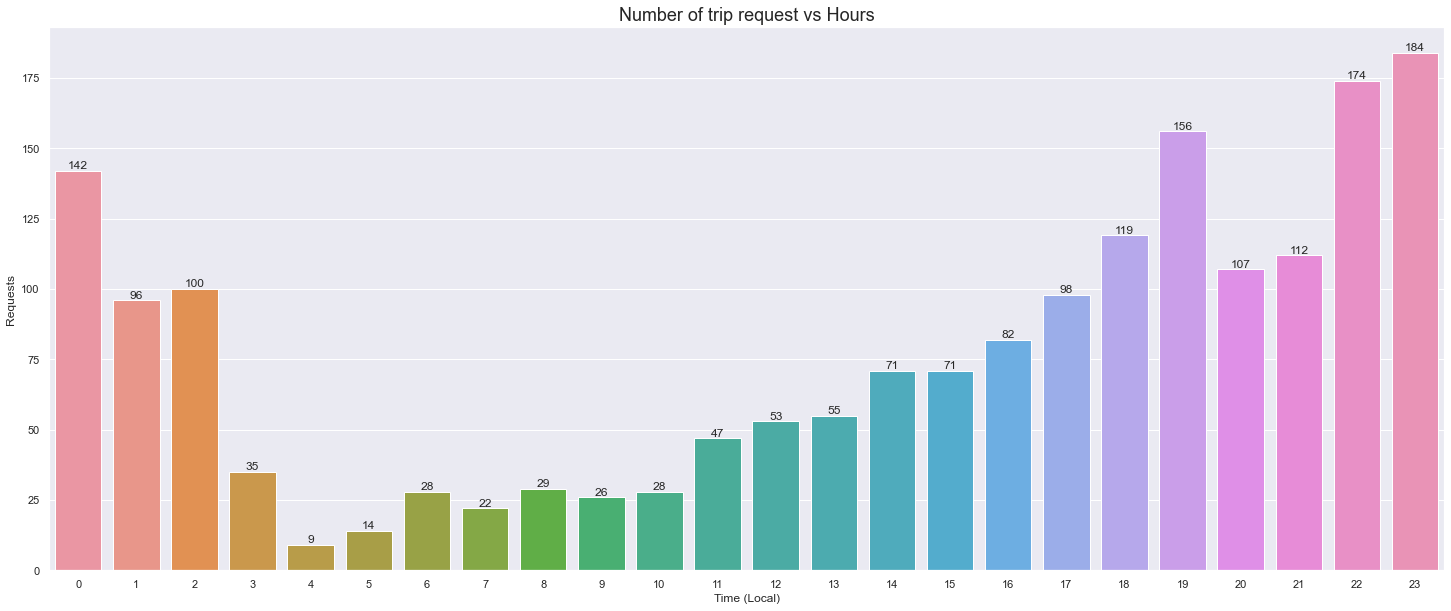

In [18]:
busiest_hour=df.groupby(['Time (Local)'])['Requests '].sum().reset_index()

sns.set(rc={'figure.figsize':(25,10)})
ax=sns.barplot(x = 'Time (Local)',y= 'Requests ' ,data = busiest_hour)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Number of trip request vs Hours',fontsize=18)

## Driver Availability vs Requested Trips

Text(0, 0.5, 'Value')

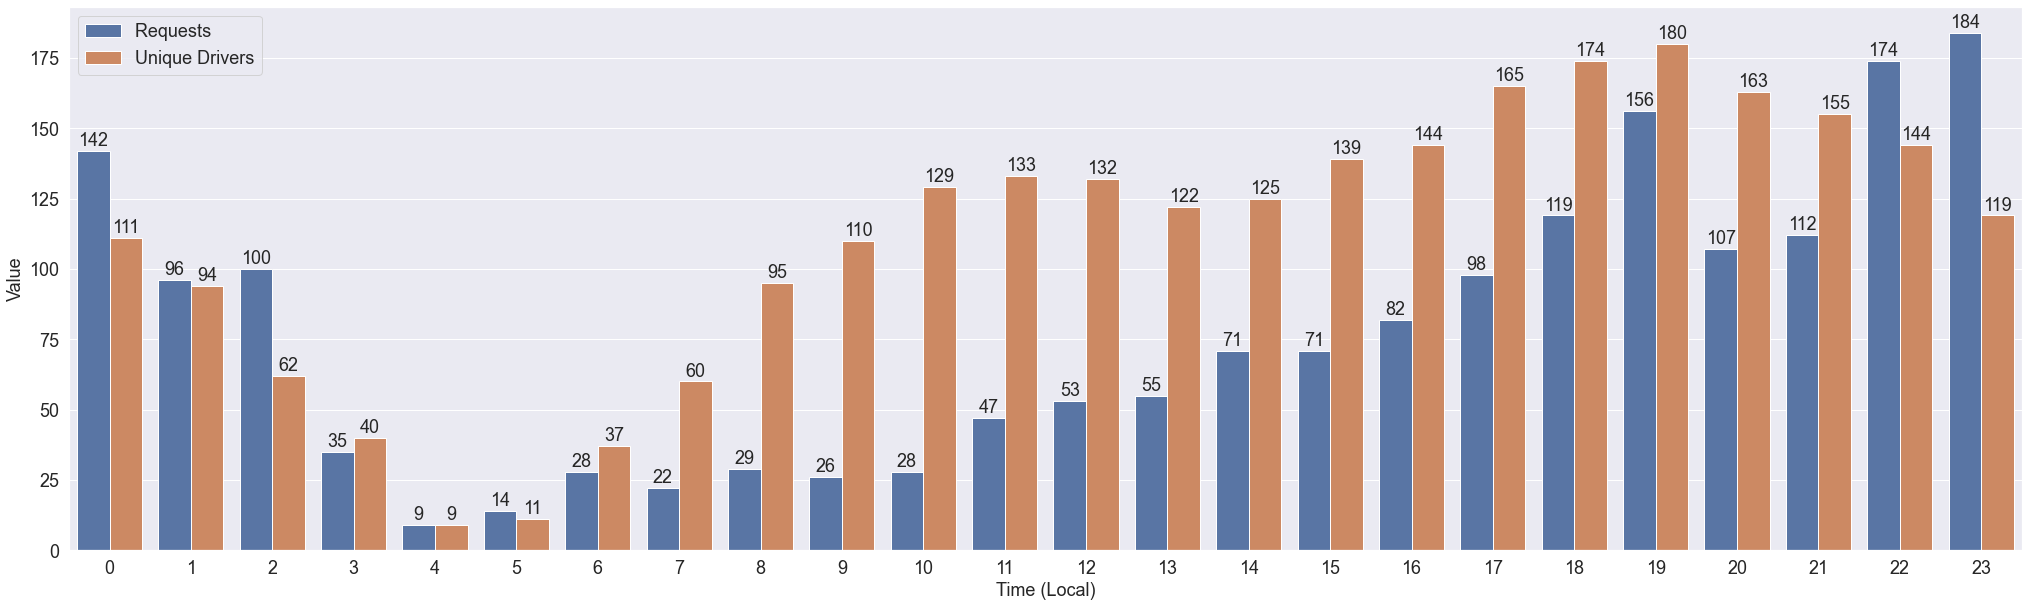

In [115]:
Hour_vs_driver_availability_vs_Requests=df.groupby(['Time (Local)']).agg({'Requests ':np.sum,'Unique Drivers':np.sum}).reset_index()

df_melted = Hour_vs_driver_availability_vs_Requests.melt(id_vars='Time (Local)', 
                    value_vars=['Requests ', 'Unique Drivers'],
                    var_name='Variable', value_name='Value')
sns.set(rc={'figure.figsize':(35,10)})
ax=sns.barplot(x = 'Time (Local)',y= 'Value' ,hue='Variable',data = df_melted,ci=None)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5,f'{height:.0f}', ha='center', va='bottom', fontsize=18)
plt.legend(fontsize=18)
plt.tick_params(axis='both', labelsize=18)
plt.xlabel("Time (Local)", fontsize=18)
plt.ylabel("Value", fontsize=18)

## Requested vs Completed Trips

Text(0, 0.5, 'Value')

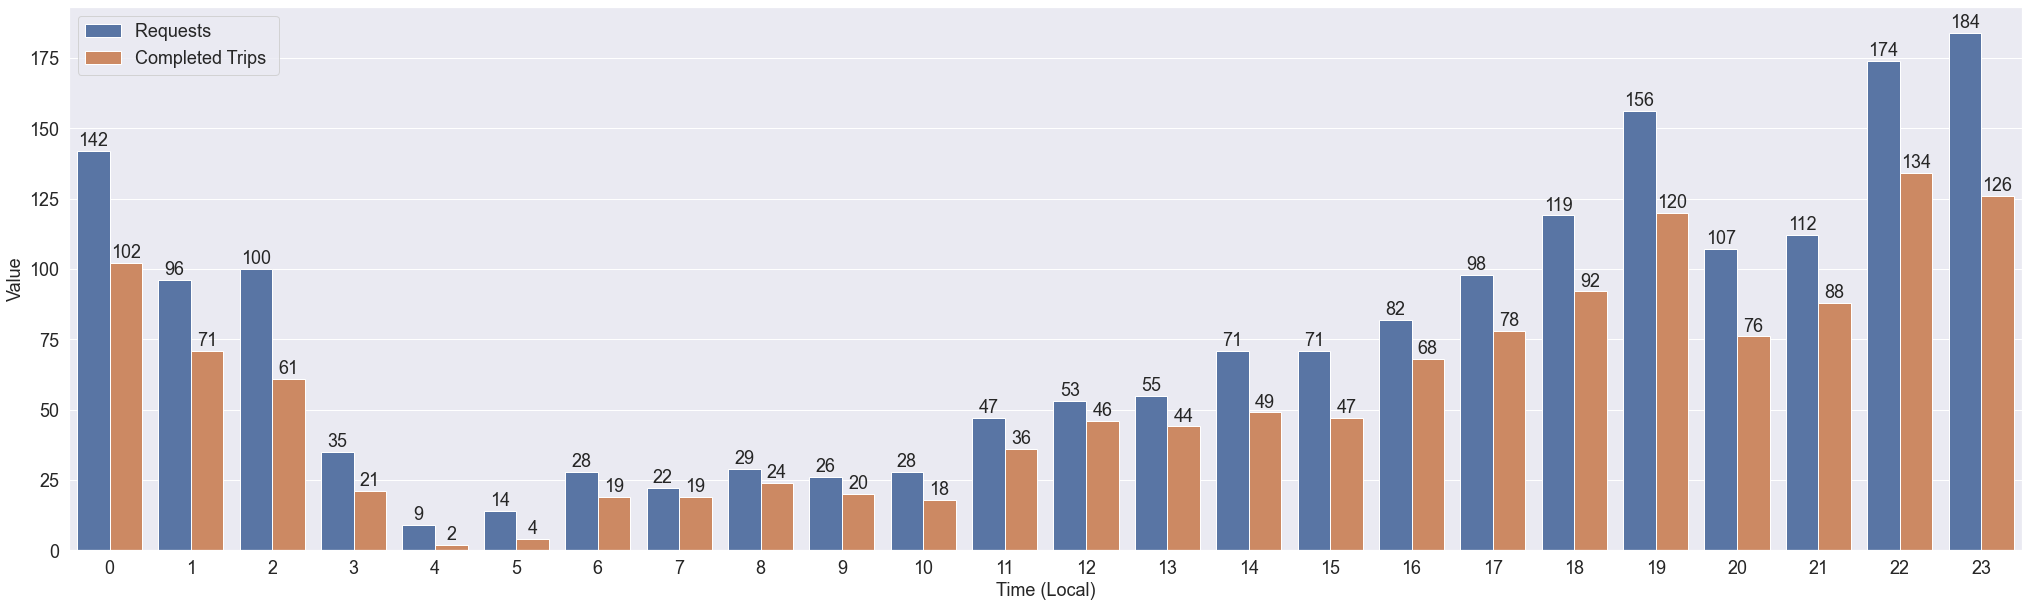

In [113]:
Hour_vs_Requested_vs_Completed_Trips=df.groupby(['Time (Local)']).agg({'Requests ':np.sum,'Completed Trips ':np.sum}).reset_index()

df_melted = Hour_vs_Requested_vs_Completed_Trips.melt(id_vars='Time (Local)', 
                    value_vars=['Requests ', 'Completed Trips '],
                    var_name='Variable', value_name='Value')
sns.set(rc={'figure.figsize':(35,10)})
ax=sns.barplot(x = 'Time (Local)',y= 'Value' ,hue='Variable',data = df_melted,ci=None)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5,f'{height:.0f}', ha='center', va='bottom', fontsize=18)
plt.legend(fontsize=18)
plt.tick_params(axis='both', labelsize=18)
plt.xlabel("Time (Local)", fontsize=18)
plt.ylabel("Value", fontsize=18)

## Requested vs Eyeballs

Text(0, 0.5, 'Value')

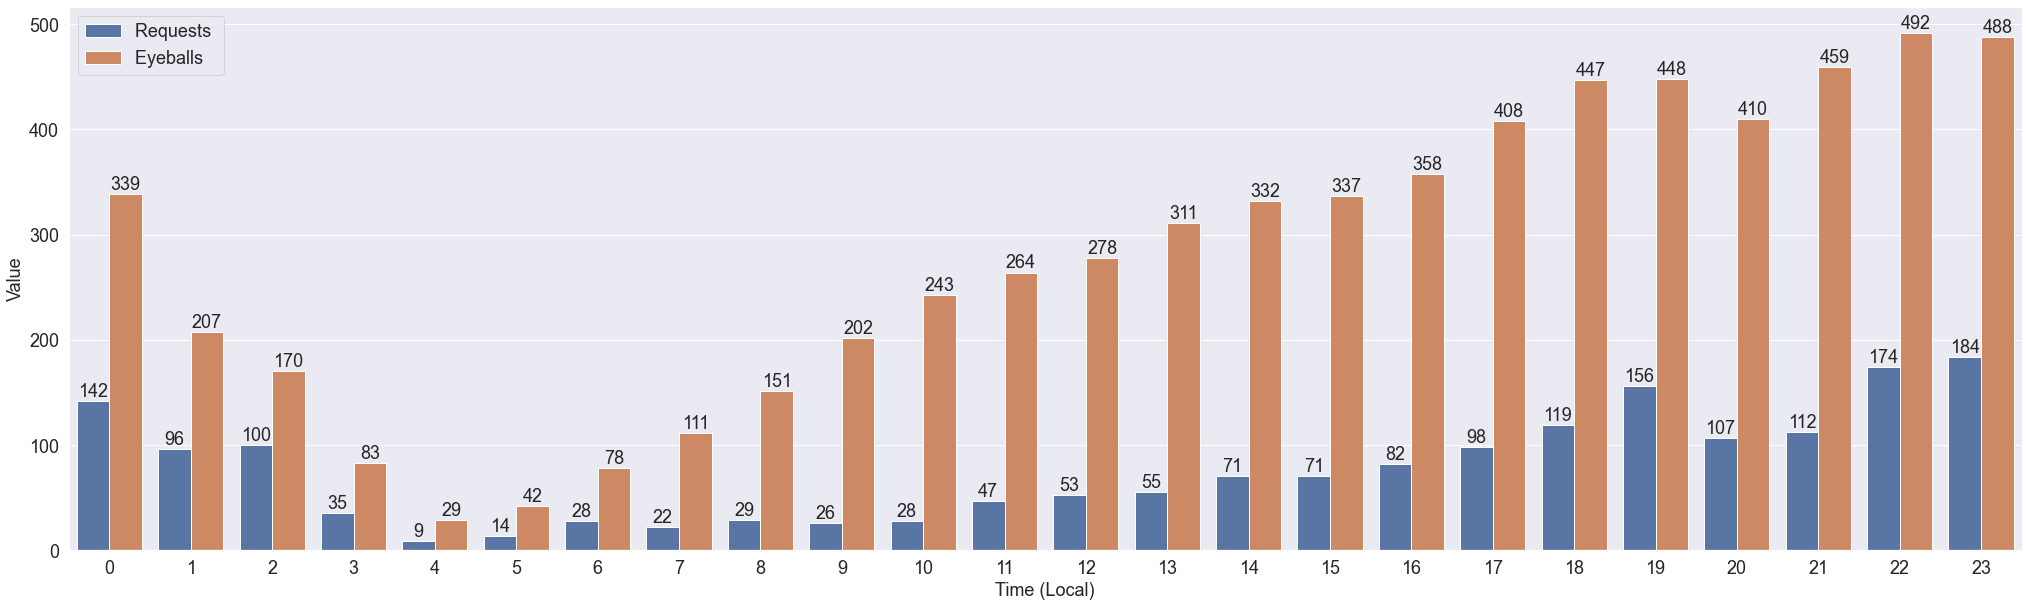

In [111]:
busiest_hour_vs_Requested_vs_Eyeballs=df.groupby(['Time (Local)']).agg({'Requests ':np.sum,'Eyeballs ':np.sum}).reset_index()

df_melted = busiest_hour_vs_Requested_vs_Eyeballs.melt(id_vars='Time (Local)', 
                    value_vars=['Requests ', 'Eyeballs '],
                    var_name='Variable', value_name='Value')
sns.set(rc={'figure.figsize':(35,10)})
ax=sns.barplot(x = 'Time (Local)',y= 'Value' ,hue='Variable',data = df_melted,ci=None)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5,f'{height:.0f}', ha='center', va='bottom', fontsize=18)
plt.legend(fontsize=18)
plt.tick_params(axis='both', labelsize=18)
plt.xlabel("Time (Local)", fontsize=18)
plt.ylabel("Value", fontsize=18)

Text(0, 0.5, 'Requests ')

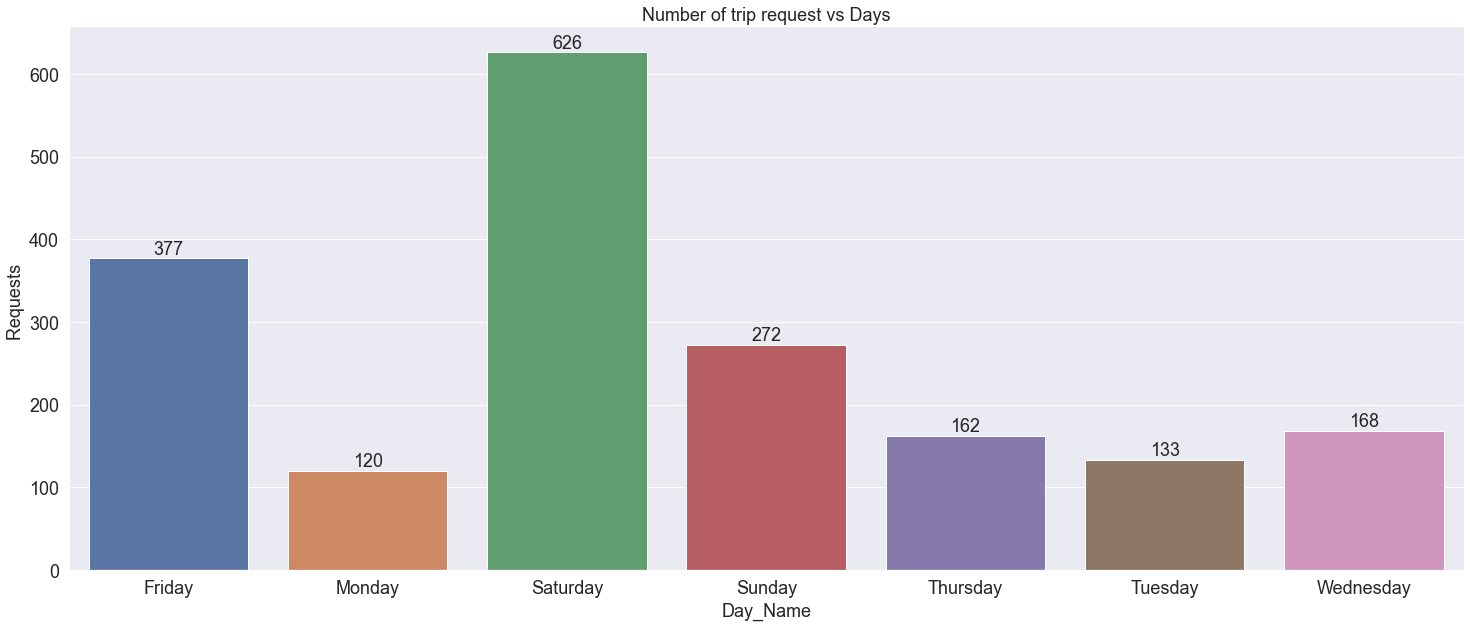

In [121]:
busiest_day_vs_Requested=df.groupby(['Day_Name'])['Requests '].sum().reset_index()

sns.set(rc={'figure.figsize':(25,10)})
ax=sns.barplot(x = 'Day_Name',y= 'Requests ' ,data = busiest_day_vs_Requested)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5,f'{height:.0f}', ha='center', va='bottom', fontsize=18)
    
plt.tick_params(axis='both', labelsize=18)  
plt.title('Number of trip request vs Days',fontsize=18)
plt.xlabel("Day_Name", fontsize=18)
plt.ylabel("Requests ", fontsize=18)

Text(0, 0.5, 'Incomplete_trips ')

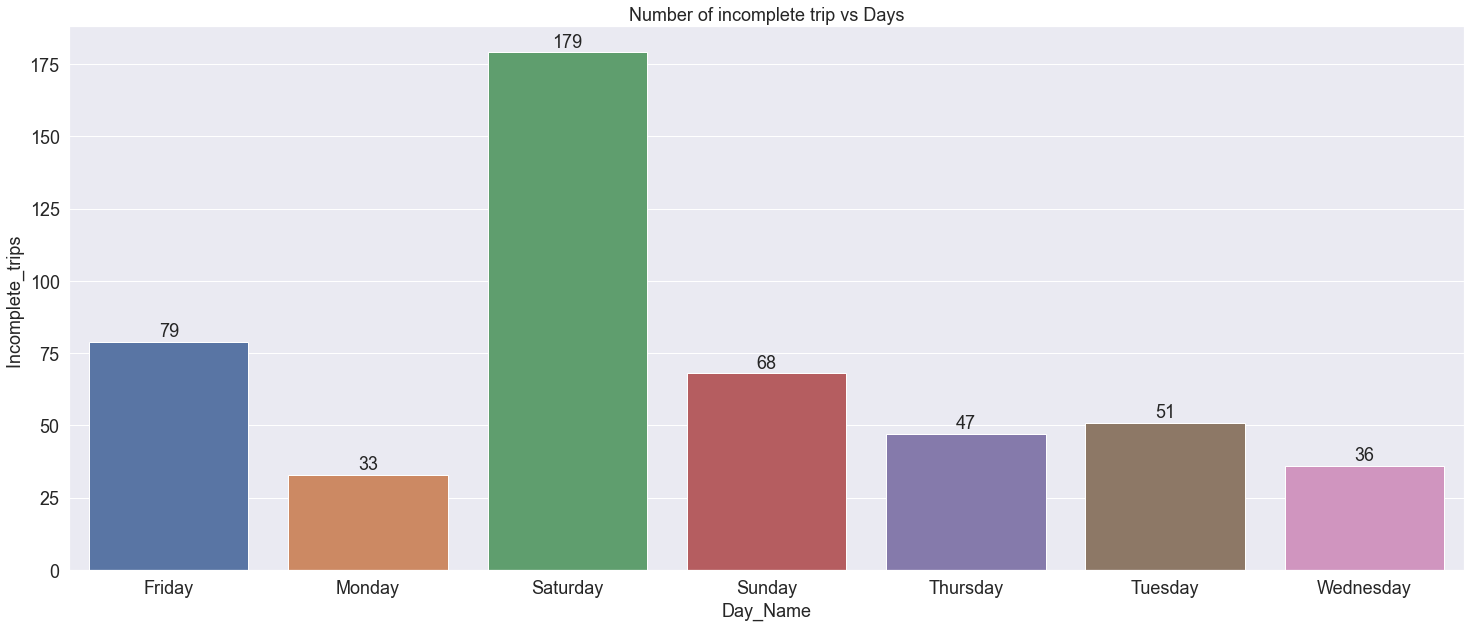

In [126]:
#Analysis of Incomplete Trips
df['Incomplete_trips']=abs(df['Requests ']-df['Completed Trips '])
day_vs_incomplete_trips=df.groupby(['Day_Name'])['Incomplete_trips'].sum().reset_index()

sns.set(rc={'figure.figsize':(25,10)})
ax=sns.barplot(x = 'Day_Name',y= 'Incomplete_trips' ,data = day_vs_incomplete_trips,ci=None)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5,f'{height:.0f}', ha='center', va='bottom', fontsize=18)
    
plt.tick_params(axis='both', labelsize=18)  
plt.title('Number of incomplete trip vs Days',fontsize=18)
plt.xlabel("Day_Name", fontsize=18)
plt.ylabel("Incomplete_trips ", fontsize=18)

## Business Specific Questions

In [50]:
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,2012-09-10,7,5,0,2,2,9
1,2012-09-10,8,6,0,2,2,14
2,2012-09-10,9,8,3,0,0,14
3,2012-09-10,10,9,2,0,1,14
4,2012-09-10,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0
332,2012-09-24,3,3,3,0,1,0
333,2012-09-24,4,1,1,0,0,0
334,2012-09-24,5,4,2,1,1,3


In [53]:
# Most Profitable date (date with most completed trips)
df.groupby('Date')['Completed Trips '].sum().reset_index().sort_values(by='Completed Trips ',ascending=False)

,Date,Completed Trips
12,2012-09-22,248
5,2012-09-15,199
11,2012-09-21,190
13,2012-09-23,111
4,2012-09-14,108
6,2012-09-16,93
2,2012-09-12,91
10,2012-09-20,70
7,2012-09-17,57
3,2012-09-13,45


In [55]:
#highest number of completed trips within a 24 hour period
df.groupby('Time (Local)')['Completed Trips '].sum().reset_index().sort_values(by='Completed Trips ',ascending=False)

,Time (Local),Completed Trips
22,22,134
23,23,126
19,19,120
0,0,102
18,18,92
21,21,88
17,17,78
20,20,76
1,1,71
16,16,68


In [56]:
#hour of the day that had the most requests during the two week period
df.groupby('Time (Local)')['Requests '].sum().reset_index().sort_values(by='Requests ',ascending=False)

,Time (Local),Requests
23,23,184
22,22,174
19,19,156
0,0,142
18,18,119
21,21,112
20,20,107
2,2,100
17,17,98
1,1,96


In [76]:
 #Percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)
df1=df[((df['Day_Name']=='Friday') & (df['Time (Local)']>=17))
    |(df['Day_Name']=='Saturday')
      |((df['Day_Name']=='Sunday') & (df['Time (Local)']<3))]
ratio=df1['Zeroes '].sum()/df['Zeroes '].sum()
print(f"Required ratio is: {ratio}")

Required ratio is: 0.44856543037088875


In [80]:
#weighted average ratio of completed trips per driver during the two week period? 
#Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate 
#number in whole period

hourly_trips = df.groupby('Time (Local)')['Completed Trips '].sum().reset_index()

hourly_unique_drivers = df.groupby('Time (Local)')['Unique Drivers'].sum().reset_index()

hourly_ratio_trips_drivers = hourly_trips['Completed Trips ']/hourly_unique_drivers['Unique Drivers']
weighted_completed_trips = (hourly_ratio_trips_drivers * (df.groupby('Time (Local)')['Completed Trips '].sum()))

total_weighted_completed_trips = weighted_completed_trips.sum()

total_completed_trips = df['Completed Trips '].sum()

weighted_avg_trips_driver = total_weighted_completed_trips/total_completed_trips
print(f'The weighted average ratio of completed trips per driver during the 2 weeks period is {weighted_avg_trips_driver:.2f}')

The weighted average ratio of completed trips per driver during the 2 weeks period is 0.63


In [87]:
## In which hour more drivers are needed
hourly_requests = df.groupby('Time (Local)')['Requests '].sum().reset_index()
# each hour unique drivers
hourly_unique_drivers = df.groupby('Time (Local)')['Unique Drivers'].sum().reset_index()
# ratio of requests to unique drivers each  hour
hourly_ratio_requests = hourly_requests['Requests ']/hourly_unique_drivers['Unique Drivers']

# find the hour with highest ratio of request to unique drivers
highest_request_ratio = hourly_ratio_requests.max()
highest_request_hour = hourly_ratio_requests.idxmax()

print(f'At {highest_request_hour} AM we can add 5 drivers every day during this two week period as the ratio for requests to unique drivers is high which is {highest_request_ratio:.2f}')

At 2 AM we can add 5 drivers every day during this two week period as the ratio for requests to unique drivers is high which is 1.61


In [90]:
#In which 72 hour period is the ratio of Zeroes to Eyeballs the highest

# add new column 72 hour period
df['72 Hour Period'] = pd.to_datetime(df['Date']).dt.floor('72H')
# grouping the data by 72 hour period and calculate the zeros to eyeballs ratio for each period
period_ratios = df.groupby('72 Hour Period').apply(lambda x: (x['Zeroes ']/x['Eyeballs ']).mean())

# find period with highest ratio
period_with_highest_ratio = period_ratios.idxmax()
period_with_highest_ratio = period_with_highest_ratio.date()
higest_ratio = period_ratios.max()

print(f'The 72-hour period with highest Zeroes to Eyeballs ratio is on {period_with_highest_ratio} with a ratio of {higest_ratio:.2f}')

The 72-hour period with highest Zeroes to Eyeballs ratio is on 2012-09-23 with a ratio of 0.35


In [91]:
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day_Name,72 Hour Period
0,2012-09-10,7,5,0,2,2,9,Monday,2012-09-08
1,2012-09-10,8,6,0,2,2,14,Monday,2012-09-08
2,2012-09-10,9,8,3,0,0,14,Monday,2012-09-08
3,2012-09-10,10,9,2,0,1,14,Monday,2012-09-08
4,2012-09-10,11,11,1,4,4,11,Monday,2012-09-08
...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,Monday,2012-09-23
332,2012-09-24,3,3,3,0,1,0,Monday,2012-09-23
333,2012-09-24,4,1,1,0,0,0,Monday,2012-09-23
334,2012-09-24,5,4,2,1,1,3,Monday,2012-09-23


<AxesSubplot:xlabel='Unique Drivers', ylabel='Requests '>

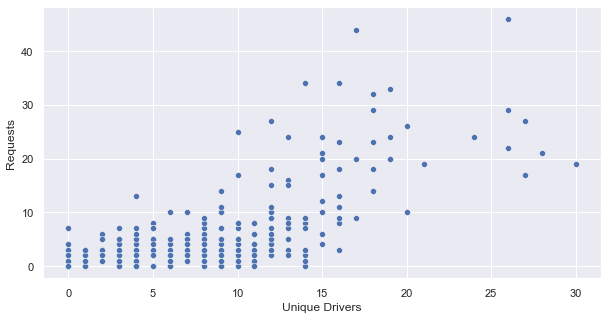

In [93]:
# Justify the statement Driver supply always increases when demand increases during the two week period

sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(x='Unique Drivers',y='Requests ',data=df)



In [101]:
# In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over 
#the two week period in terms of unique requests? A new shift starts in every 8 hours. 
#Assume that a driver will work same shift each day.

# no: of unique requests each hour
unique_requests_per_hour = df.groupby('Time (Local)')['Requests '].nunique()
# window of 8 hours across the hours to find the 8 consecutive hours with the highest number of unique requests.
busiest_8hours_start = unique_requests_per_hour.rolling(window = 8).sum().idxmax()

#convert start hours to time stamp
busiest_8hours_start = pd.Timestamp(busiest_8hours_start*3600000000000) # convert hours to nano seconds
busiest_8hours_end = busiest_8hours_start + pd.Timedelta(hours = 8)
print(f'The busiest 8-hour period in the two weeks period is {busiest_8hours_start.time()} to {busiest_8hours_end.time()} hours')


The busiest 8-hour period in the two weeks period is 22:00:00 to 06:00:00 hours


In [116]:
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day_Name,72 Hour Period
0,2012-09-10,7,5,0,2,2,9,Monday,2012-09-08
1,2012-09-10,8,6,0,2,2,14,Monday,2012-09-08
2,2012-09-10,9,8,3,0,0,14,Monday,2012-09-08
3,2012-09-10,10,9,2,0,1,14,Monday,2012-09-08
4,2012-09-10,11,11,1,4,4,11,Monday,2012-09-08
...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,Monday,2012-09-23
332,2012-09-24,3,3,3,0,1,0,Monday,2012-09-23
333,2012-09-24,4,1,1,0,0,0,Monday,2012-09-23
334,2012-09-24,5,4,2,1,1,3,Monday,2012-09-23
